In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os, shutil
import matplotlib.pyplot as plt

In [19]:
#define batch sizes and flags
size_training_data = 180
size_validation_data = 20
size_test_data = 20
data_init=False

# Define directory names
original_dataset_dir=r'C:\Users\david\OneDrive\Inholland\DeepLearning\DataSets'
base_dir=r'C:\Users\david\OneDrive\Inholland\DeepLearning\DataSets\cats-and-dogs'
train_dir=os.path.join(base_dir, 'Train')
validation_dir=os.path.join(base_dir, 'Validate')

test_dir=os.path.join(base_dir, 'Test')
train_cats_dir=os.path.join(train_dir , 'Cat')
train_dogs_dir=os.path.join(train_dir , 'Dog')
validation_cats_dir=os.path.join(validation_dir , 'Cat')
validation_dogs_dir=os.path.join(validation_dir , 'Dog')
test_cats_dir=os.path.join(test_dir , 'Cat')
test_dogs_dir=os.path.join(test_dir , 'Dog')


In [20]:
if data_init:

    # Create those directories
    os.mkdir(base_dir)
    os.mkdir(train_dir)
    os.mkdir(validation_dir)
    os.mkdir(test_dir)
    os.mkdir(train_cats_dir)
    os.mkdir(train_dogs_dir)
    os.mkdir(validation_cats_dir)
    os.mkdir(validation_dogs_dir)
    os.mkdir(test_cats_dir)
    os.mkdir(test_dogs_dir)

In [21]:
    # Copy files to the temporary spaces
    fnames=['cat-{}.jpg'.format(i) for i in range(size_training_data)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_cats_dir, fname)
        try:
            shutil.copyfile(src, dst)
        except:
            pass
        
    fnames=['cat-{}.jpg'.format(i) for i in range(size_training_data, size_training_data + size_validation_data)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(validation_cats_dir, fname)
        try:
            shutil.copyfile(src, dst)
        except:
            pass

    fnames=['cat-{}.jpg'.format(i) for i in range(size_training_data + size_validation_data, size_training_data + size_validation_data + size_test_data)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(test_cats_dir, fname)
        try:
            shutil.copyfile(src, dst)
        except:
            pass

    fnames=['dog-{}.jpg'.format(i) for i in range(size_training_data)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_dogs_dir, fname)
        try:
            shutil.copyfile(src, dst)
        except:
            pass
        
    fnames=['dog-{}.jpg'.format(i) for i in range(size_training_data, size_training_data + size_validation_data)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(validation_dogs_dir, fname)
        try:
            shutil.copyfile(src, dst)
        except:
            pass

    fnames=['dog-{}.jpg'.format(i) for i in range(size_training_data + size_validation_data, size_training_data + size_validation_data + size_test_data)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(test_dogs_dir, fname)
        try:
            shutil.copyfile(src, dst)
        except:
            pass

In [22]:
model=models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(300, 300, 3),
                        data_format='channels_last'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))  
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))        
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))        
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
#Show statistics
print('Total training cat images: ', len(os.listdir(train_cats_dir)))
print('Total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('Total test cat images: ', len(os.listdir(test_cats_dir)))
print('Total training dog images: ', len(os.listdir(train_dogs_dir)))
print('Total validation dog images: ', len(os.listdir(validation_dogs_dir)))
print('Total test dog images: ', len(os.listdir(test_dogs_dir)))
model.summary()

Total training cat images:  230
Total validation cat images:  24
Total test cat images:  24
Total training dog images:  172
Total validation dog images:  24
Total test dog images:  24
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 149, 149, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 73, 73, 64)       0         
 g2D)                                                            
                                                                 
 c

In [ ]:
# Train the model on the data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(300,300),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                         target_size=(300,300),
                                                         batch_size=10,
                                                         class_mode='binary')
#
# To make sure that you have "at least steps_per_epoch * epochs batches", set the
# steps_per_epoch to 
#
# steps_per_epoch = len(X_train)//batch_size
#
history=model.fit(train_generator,
                  steps_per_epoch=9,
                  epochs=100,
                  validation_data=validation_generator,
                  validation_steps=2)        
                  
model_save_name=os.path.join(base_dir, 'cats_and_dogs_1.h5')
model.save(model_save_name)

# Evaluate the model on the test data
print("Evaluate on test data")
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(300,300),
                                                    batch_size=10,
                                                    class_mode='binary')
results = model.evaluate(test_generator)
print("test loss, test acc:", results)

Found 402 images belonging to 2 classes.
Found 48 images belonging to 2 classes.
Epoch 1/100
9/9 [==============================] - 30s 1s/step - loss: 0.7637 - accuracy: 0.5111 - val_loss: 0.7018 - val_accuracy: 0.5000
Epoch 2/100
9/9 [==============================] - 14s 1s/step - loss: 0.6994 - accuracy: 0.5185 - val_loss: 0.7404 - val_accuracy: 0.4000
Epoch 3/100
9/9 [==============================] - 12s 1s/step - loss: 0.7022 - accuracy: 0.4556 - val_loss: 0.6864 - val_accuracy: 0.6500
Epoch 4/100
9/9 [==============================] - 11s 1s/step - loss: 0.6974 - accuracy: 0.5123 - val_loss: 0.6796 - val_accuracy: 0.8000
Epoch 5/100
9/9 [==============================] - 11s 1s/step - loss: 0.6946 - accuracy: 0.5741 - val_loss: 0.6987 - val_accuracy: 0.4500
Epoch 6/100
9/9 [==============================] - 12s 1s/step - loss: 0.6925 - accuracy: 0.5278 - val_loss: 0.6829 - val_accuracy: 0.6000
Epoch 7/100
9/9 [==============================] - 12s 1s/step - loss: 0.6826 - accur

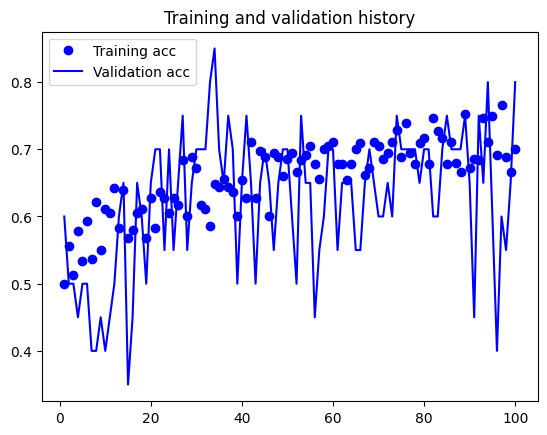

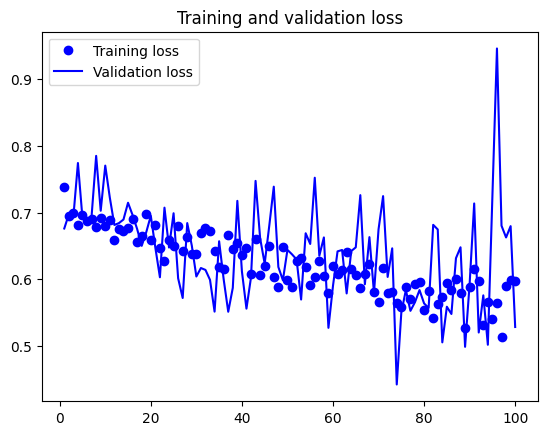

In [8]:
# Plot the history of the training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation history')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
# Check if GPU is available

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'
tf.debugging.set_log_device_placement(True)

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Create a simple neural network
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(100,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Generate synthetic data
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(10, size=(1000,))

# Train the model
model.fit(data, labels, epochs=10, batch_size=32)

print(model.summary())


Num GPUs Available:  1
Epoch 1/10
32/32 [==============================] - 2s 10ms/step - loss: 2.3307 - accuracy: 0.1050
Epoch 2/10
32/32 [==============================] - 0s 7ms/step - loss: 2.2981 - accuracy: 0.1120
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 2.2779 - accuracy: 0.1300
Epoch 4/10
32/32 [==============================] - 0s 7ms/step - loss: 2.2620 - accuracy: 0.1540
Epoch 5/10
32/32 [==============================] - 0s 9ms/step - loss: 2.2493 - accuracy: 0.1560
Epoch 6/10
32/32 [==============================] - 0s 6ms/step - loss: 2.2281 - accuracy: 0.1900
Epoch 7/10
32/32 [==============================] - 0s 11ms/step - loss: 2.2135 - accuracy: 0.1810
Epoch 8/10
32/32 [==============================] - 0s 8ms/step - loss: 2.1882 - accuracy: 0.2060
Epoch 9/10
32/32 [==============================] - 0s 6ms/step - loss: 2.1705 - accuracy: 0.2170
Epoch 10/10
32/32 [==============================] - 0s 5ms/step - loss: 2.1341 - accuracy: 0

In [33]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TensorFlow warnings
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import time 

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 784)).astype('float32') / 255
test_images = test_images.reshape((10000, 784)).astype('float32') / 255

# Define the model architecture
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the GPU
start_time = time.time()
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.1)
end_time = time.time()

# Print execution time
print("Training completed in {:.2f} seconds.".format(end_time - start_time))

Epoch 1/10
422/422 [==============================] - 4s 6ms/step - loss: 0.2843 - accuracy: 0.9195 - val_loss: 0.1244 - val_accuracy: 0.9650
Epoch 2/10
422/422 [==============================] - 3s 6ms/step - loss: 0.1163 - accuracy: 0.9660 - val_loss: 0.0870 - val_accuracy: 0.9753
Epoch 3/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0744 - accuracy: 0.9786 - val_loss: 0.0796 - val_accuracy: 0.9768
Epoch 4/10
422/422 [==============================] - 2s 6ms/step - loss: 0.0532 - accuracy: 0.9847 - val_loss: 0.0711 - val_accuracy: 0.9788
Epoch 5/10
422/422 [==============================] - 2s 6ms/step - loss: 0.0396 - accuracy: 0.9884 - val_loss: 0.0764 - val_accuracy: 0.9775
Epoch 6/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0297 - accuracy: 0.9919 - val_loss: 0.0668 - val_accuracy: 0.9818
Epoch 7/10
422/422 [==============================] - 2s 6ms/step - loss: 0.0212 - accuracy: 0.9946 - val_loss: 0.0653 - val_accuracy: 0.9805
Epoch 